In [1]:
# importing all packages
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import nltk 
nltk.download('stopwords')
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sethi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\sethi\AppData\Local\Temp/ipykernel_23120/3125126625.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# Reading Tweets 
tweets_df=pd.read_csv("levis_tweets_new.csv")

In [3]:
tweets_df.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'quote_count', 'reply_count', 'hashtags', 'symbols',
       'urls_url', 'urls_t.co', 'urls_expanded_url', 'media_url', 'media_t.co',
       'media_expanded_url', 'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_created_at', 'retweet_source', 

In [4]:
# keeping useful columns in final dataframe
tweets_df=tweets_df[['created_at','text','retweet_count','mentions_screen_name','retweet_text',
                     'retweet_favorite_count','retweet_screen_name','retweet_description','is_retweet']]

In [5]:
# changing column-created_at to datetime
tweets_df['created_at']=pd.to_datetime(tweets_df['created_at']).dt.strftime('%Y-%m-%d')

In [6]:

tweets_df.head()

,created_at,text,retweet_count,mentions_screen_name,retweet_text,retweet_favorite_count,retweet_screen_name,retweet_description,is_retweet
0,2019-08-15,IMA THICK BITCH I NEED TEMPO https://t.co/EIE5wTvZuW,3217,lizzo,IMA THICK BITCH I NEED TEMPO https://t.co/EIE5wTvZuW,34253,lizzo,America’s Next Bop Star <U+0001F351> @YITTY,True
1,2019-08-15,PRETTY IN DENIM https://t.co/e4nMZyaYtS,2649,lizzo,PRETTY IN DENIM https://t.co/e4nMZyaYtS,25624,lizzo,America’s Next Bop Star <U+0001F351> @YITTY,True
2,2018-09-06,"Fresh Leaves, October 4 @LEVIS https://t.co/8lAqzq5AB9",1513,jtimberlake LEVIS,"Fresh Leaves, October 4 @LEVIS https://t.co/8lAqzq5AB9",21617,jtimberlake,I write hooks but I’m really just here for the bridge.,True
3,2018-05-18,All about them @levis last night <U+0001F456> https://t.co/KN93CPn9UO,912,lucyhale LEVIS,All about them @levis last night <U+0001F456> https://t.co/KN93CPn9UO,11200,lucyhale,mama to elvis & ethel <U+0001F43E>,True
4,2019-04-01,My new @LEVIS collection just dropped. https://t.co/Jp0PYWSJBH https://t.co/y11CTojyDT,561,jtimberlake LEVIS,My new @LEVIS collection just dropped. https://t.co/Jp0PYWSJBH https://t.co/y11CTojyDT,6399,jtimberlake,I write hooks but I’m really just here for the bridge.,True


In [7]:
# Filtering tweets after November, 2019
tweets_df=tweets_df[tweets_df['created_at']>='2019-11-01']

# Creating word cloud

DATA CLEANING

In [8]:
# creating function to clean the text
def preprocess(raw_text):
    
    #regular expression keeping only letters 
    
    letters_only_text=re.sub(r'http\S+','',raw_text,flags=re.MULTILINE)
    letters_only_text=re.sub(r'https\S+','',raw_text,flags=re.MULTILINE)
    letters_only_text = re.sub("[^a-zA-Z]", " ", letters_only_text)
    # convert to lower case and split into words 
    words = letters_only_text.lower().split()
    cleaned_words = []
    # remove stopwords
    stop_words = stopwords.words('english')
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    return " ".join(cleaned_words)

In [9]:
# creating function to remove emojis
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\u0001f1f2"
        u"\u0001f1fD"
        u"\u000FF"
        u"\U0001F300-\U0001F3DF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"
        u"\u0000"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [10]:
# applying fuction preprocess
tweets_df['retweet_description']=tweets_df['retweet_description'].apply(preprocess)

In [11]:
# applying fuction deEmojify
tweets_df['retweet_description']=tweets_df['retweet_description'].apply(deEmojify)

In [12]:
# using textbob to correct spellings of incorrect words in tweets
from textblob import TextBlob  
tweets_df['retweet_description']=tweets_df['retweet_description'].apply(lambda x: str(TextBlob(x).correct()))

In [13]:
# using nltk packege to find stem words for each word 
from nltk.stem import PorterStemmer  
st=PorterStemmer()  
tweets_df['retweet_description']=tweets_df['retweet_description'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

In [14]:
#Most common 20 words from Levis tweets 
from collections import Counter
Counter(" ".join(tweets_df["retweet_description"]).split()).most_common(20)

[('u', 34),
 ('follow', 28),
 ('offici', 27),
 ('news', 17),
 ('us', 15),
 ('sweet', 14),
 ('levi', 14),
 ('strain', 14),
 ('co', 14),
 ('compani', 14),
 ('industri', 14),
 ('tend', 14),
 ('also', 14),
 ('lewi', 14),
 ('doctor', 14),
 ('account', 9),
 ('twitter', 8),
 ('d', 8),
 ('cultur', 8),
 ('make', 6)]

In [17]:
# Turn most frequent 30 words into data series
freq=pd.Series(' '.join(tweets_df["retweet_description"]).split()).value_counts()[:30]  

In [18]:
# Turn series into list name freq
freq=list(freq.index)  
freq

['u',
 'follow',
 'offici',
 'news',
 'us',
 'co',
 'levi',
 'also',
 'sweet',
 'tend',
 'lewi',
 'doctor',
 'compani',
 'industri',
 'strain',
 'account',
 'twitter',
 'cultur',
 'd',
 'make',
 'pop',
 'b',
 'live',
 'love',
 'mr',
 'erscommun',
 'levisstadium',
 'vers',
 'francisco',
 'san']

In [19]:
# select all the words that is not in freq
tweets_df['retweet_description']=tweets_df['retweet_description'].apply(lambda sen:' '.join(x for x in sen.split() if x not in freq))  
tweets_df['retweet_description'].head()

6     profession gaze famili associ w shock recurr updat dream apparel
8     welcom paul disgrac everybodi say black matter                  
23    x super bowl champion                                           
26    x super bowl champion                                           
49                                                                    
Name: retweet_description, dtype: object

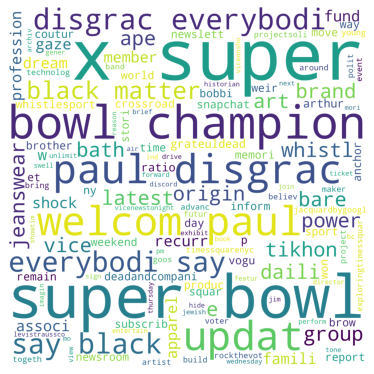

In [20]:
# Build word cloud
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in tweets_df['retweet_description']: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Plotting trend of likes received on tweets and comparing with the trend of stock return over same duration

In [21]:
# aggregating data per day and pulling  maximum likes received by tweet in a day 
tweets_df1=tweets_df.groupby('created_at').max('retweet_favorite_count')

In [22]:
# total datapoints of 47 months
len(tweets_df1)

47

In [23]:
tweets_df1.reset_index(inplace=True)

In [24]:
# sorting dataframe with ascending order of tweets creation date
tweets_df1=tweets_df1.sort_values(by='created_at',ascending=True)


In [25]:
# checking minimum date 
tweets_df1['created_at'].min()

'2019-11-01'

In [26]:
# checking maximum date 
tweets_df1['created_at'].max()

'2021-10-18'

In [27]:
#Downloading stock data of Levis from Yahoo Finance Data for the same date range 
tickers = ['LEVI']
start_date = '2019-11-01'
end_date = '2021-10-18'
gdata= yf.download(tickers,start=start_date,end=end_date,progress=(False))

In [28]:
gdata.reset_index(inplace=True)

In [29]:
# calculating daily returns for Levis
gdata['Return']=gdata['Adj Close'].pct_change()

In [30]:
gdata

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2019-11-01,17.840000,17.968000,17.719999,17.820000,17.382263,1109100,NaN
1,2019-11-04,17.920000,17.940001,17.070000,17.120001,16.699461,953100,-0.039282
2,2019-11-05,17.150000,17.770000,17.150000,17.350000,16.923809,843200,0.013434
3,2019-11-06,17.309999,17.309999,17.100000,17.150000,16.728724,870300,-0.011527
4,2019-11-07,17.170000,17.700001,17.150000,17.510000,17.079878,1061200,0.020991
...,...,...,...,...,...,...,...,...
488,2021-10-11,25.475000,25.799999,24.424999,24.480000,24.296425,2937900,-0.041879
489,2021-10-12,24.610001,24.750000,24.020000,24.490000,24.306351,2982100,0.000409
490,2021-10-13,24.600000,24.840000,24.280001,24.700001,24.514776,1975700,0.008575
491,2021-10-14,24.870001,25.025000,24.500000,24.780001,24.594177,2390900,0.003239


In [31]:
# changing datatype of new dataframe's column createdat to datetime
tweets_df1['created_at']=pd.to_datetime(tweets_df1['created_at'])

In [32]:
tweets_df1.dtypes

created_at                datetime64[ns]
retweet_count             int64         
retweet_favorite_count    int64         
is_retweet                bool          
dtype: object

In [33]:
# merging dataframes 
comb_df=gdata.merge(tweets_df1,left_on='Date',right_on='created_at',how='inner')

In [34]:
# total 45 datapoints after merging
comb_df.shape

(45, 12)

In [35]:
# selecting final columns in combined dataframe 
comb_df=comb_df[['Date','Adj Close','retweet_count','retweet_favorite_count','is_retweet','Return']]

In [36]:
comb_df=comb_df.sort_values(by='Date', ascending=True)

In [37]:
comb_df

,Date,Adj Close,retweet_count,retweet_favorite_count,is_retweet,Return
0,2019-11-01,17.382263,9,27,True,NaN
1,2019-11-21,16.162971,10,71,True,0.012218
2,2019-12-03,16.475109,19,67,True,0.015024
3,2019-12-04,16.572653,10,38,True,0.005921
4,2020-01-09,18.250402,11,49,True,-0.021443
5,2020-01-21,19.508715,37,163,True,0.001001
6,2020-01-30,19.264853,43,318,True,-0.002525
7,2020-02-20,19.587221,16,46,True,0.031992
8,2020-02-26,17.413038,6,26,True,-0.053752
9,2020-02-27,17.168200,11,59,True,-0.014061


In [38]:
# Normalizing data of column-retweet_favorite_count

comb_df['retweet_favorite_count']=(comb_df['retweet_favorite_count']-comb_df['retweet_favorite_count'].min())/(comb_df['retweet_favorite_count'].max()-comb_df['retweet_favorite_count'].min())

<Figure size 1440x1440 with 0 Axes>

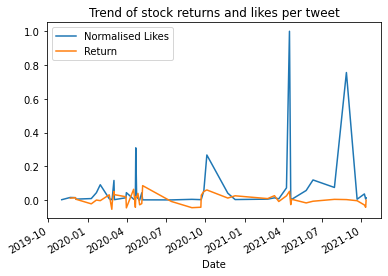

<Figure size 1440x1440 with 0 Axes>

In [39]:
# plotting return of levis stocks and likes received on tweets involving levis
plot=comb_df.plot(x='Date',y=['retweet_favorite_count','Return'], title="Trend of stock returns and likes per tweet")
plt.legend(['Normalised Likes','Return'])
plt.figure(figsize=(20,20))

In [40]:
comb_df.isnull().sum()

Date                      0
Adj Close                 0
retweet_count             0
retweet_favorite_count    0
is_retweet                0
Return                    1
dtype: int64

FINDING CORRELATION BETWEEN STOCK RETURNS AND LIKES ON TWEET 

In [41]:
import numpy as np
#a=comb_df.to_numpy()
np.corrcoef(comb_df.loc[1:,"retweet_favorite_count"],comb_df["Return"].dropna())

array([[1.       , 0.2458824],
       [0.2458824, 1.       ]])

In [42]:
# reading labelled file for tweets posted after Nov, 2019
tweets_df_cat=pd.read_csv('filter_tweets_category.csv')

In [43]:
# changing datatype to datetime
tweets_df_cat['created_at']=pd.to_datetime(tweets_df_cat['created_at'])

In [44]:
# merging new file with stocks data
comb_df_cat=tweets_df_cat.merge(gdata,left_on='created_at',right_on='Date',how='inner')

In [45]:
#selecting useful columns in final dataframe
comb_df_cat=comb_df_cat[['retweet_count','retweet_favorite_count','Marketing Categories','Adj Close']]

In [46]:
# creating dummies 
comb_df_dummy=pd.get_dummies(comb_df_cat,prefix=['is'])

In [47]:
comb_df_dummy

,retweet_count,retweet_favorite_count,Adj Close,is_Celebrity,is_Clothing Brand,is_News,is_Others,is_Sports
0,82,3301,28.671627,0,0,0,0,1
1,112,2499,26.668505,1,0,0,0,0
2,24,403,26.668505,1,0,0,0,0
3,18,183,26.668505,1,0,0,0,0
4,161,1035,12.330154,0,0,0,0,1
5,98,896,14.794215,0,0,0,0,1
6,63,411,26.323614,1,0,0,0,0
7,67,401,17.501181,0,1,0,0,0
8,43,318,19.264853,0,0,0,0,1
9,18,265,27.313629,1,0,0,0,0


# Regression 

In [48]:
x1,y1=comb_df_dummy[['retweet_favorite_count','is_Celebrity','is_Clothing Brand','is_News','is_Others','is_Sports']],comb_df_dummy['retweet_count']

In [49]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()  
regression.fit(x1, y1)

LinearRegression()

In [50]:
import statsmodels.api as sm
X21 = sm.add_constant(x1)
est = sm.OLS(y1, X21)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          retweet_count   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     8.678
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           9.48e-06
Time:                        10:45:24   Log-Likelihood:                -226.01
No. Observations:                  49   AIC:                             464.0
Df Residuals:                      43   BIC:                             475.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     21

C:\Users\sethi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
